In [34]:
import os 
from time import perf_counter
from typing import Dict
import pickle


import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

#### Static Variables

In [35]:
dataset_dir ="C:/Users/admin/Desktop/codespace/python/Structure-from-Motion/dataset/box"
output_dir ="C:/Users/admin/Desktop/codespace/python/output_sfm"

#### Directory Validation and Image count

In [36]:
if os.path.isdir(dataset_dir) is not True:
    raise NotADirectoryError(f'The Directory {datadir} not found')

if os.path.isdir(output_dir) is not True:
    raise NotADirectoryError(f'The Directory {output_dir} not found')    
    
dataset_dir = os.path.abspath(dataset_dir)    
files = [os.path.join(dataset_dir,file ) for file in os.listdir(dataset_dir)]

print(f'files count {len(files)}')

files count 19


#### basename of a file without Extension

In [37]:
def get_basename(file_path:str) -> str:
    """Extracts Basename of File with out Extension."""
    baseName = os.path.basename(file_path).split(".")[:-1]
    return ".".join(baseName) if isinstance(baseName, list) else baseName

#### Class Defines Image Objects

In [38]:
class ImageDetails(object):
    """Class Defines Image Details Object."""

    name: str
    height: int
    width: int
    channel: int

    __slots__ = ("name", "height", "width", "channel")

    def __init__(self, name: str):
        self.name = name
        image = cv2.imread(name)
        self.height, self.width = image.shape[:2]
        self.channel = 1 if image.ndim == 2 else image.shape[-1]

    @property
    def basename(self) -> str:
        return get_basename(self.name)

    @property
    def extension(self) -> str:
        return os.path.basename(self.name).split(".")[-1]

    @property
    def image_size(self) -> int:
        return int((self.height * self.width * self.channel) / (1024 * 1024))
    
    def __str__ (self):
        return f'Name {self.basename} Height {self.height} Width {self.width} Channel {self.channel}'

#### Loading Image Object With Time stamp

In [39]:
start_time = perf_counter()

image_details_list = list(
    map(lambda x: ImageDetails(x), files)
)
end_time = perf_counter()
execution_time = end_time - start_time

print('took {0:.8f}s to execute'.format(execution_time))


print(f'Image Details count {len(image_details_list)}')

took 1.60879520s to execute
Image Details count 19


#### Dipsplaying Image Size

In [40]:
for item in image_details_list:
    print(str(item) , item.image_size)

Name IMG_20200328_172713 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172726 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172739 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172754 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172806 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172819 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172829 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172841 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172851 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172858 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172906 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172912 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172919 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_172924 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_173044 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_173053 Height 4160 Width 2340 Channel 3 27
Name IMG_20200328_173059

#### SIFT Feature Extraction for aingel Image and With Time Stamp

Image Channel 1
took 1.76502920s to execute
KP count 13598


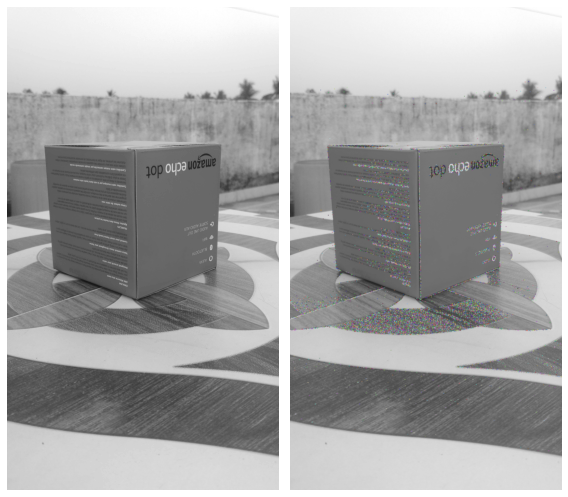

In [41]:
start_time = perf_counter()
image_path = files[0]
image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
channel = 1 if image.ndim == 2 else image.shape[-1]
print(f'Image Channel {channel}')
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image,None)


imgkp=cv2.drawKeypoints(image,keypoints, None) 
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(8,8)
ax1,ax2 = axes.ravel()
ax1.imshow(image, cmap='gray')
ax2.imshow(imgkp, cmap='gray')
ax1.axis('off')
ax2.axis('off')
fig.tight_layout()

end_time = perf_counter()
execution_time = end_time - start_time
print('took {0:.8f}s to execute'.format(execution_time))

print(f'KP count {len(keypoints)}')

In [42]:
print(keypoints[1], descriptors[1])

print(len(keypoints), descriptors.shape)

<KeyPoint 000001ACACADA3F0> [ 15.  16.   1.  36. 124.   0.   0.   1.  38.   2.   0.  19.  45.   2.
   1.   9.   5.   0.   0.   2.  25.   6.   1.   3.   0.   0.   1.   2.
   2.   0.   0.   0.  59.  65.   5.  42. 143.   1.   0.   0. 143.   9.
   0.  14. 106.  17.   5.  31.  25.   1.   2.  14. 143.  54.   5.  12.
  11.   3.   9.  16.  30.   1.   0.   4. 109.  29.   6.  40. 143.   4.
   0.   2. 143.  12.   0.  11. 103.   7.   0.  16.  48.   3.   1.  16.
 143.  18.   1.   5.  41.   4.   2.   9.  50.   2.   1.  18.  45.  19.
   8.  35.  48.   7.   2.   7. 143.   4.   0.  11.  45.   5.   3.  37.
  30.   2.   0.   6. 143.  37.   8.   7.  17.   0.   0.   1.  25.  16.
  33.  27.]
13598 (13598, 128)


#### Saving the Keypoint and Descriptors in Pickle File 

In [43]:
pickle_kp=list(map(lambda p: (p.pt[0],p.pt[0], p.size, p.angle, p.response, p.octave, p.class_id),keypoints))

features = {
    "keypoint": pickle_kp,
    "descriptor": descriptors,
}
base_name = get_basename(image_path)
pickle_file_path=os.path.join(output_dir,f'{base_name}.pickle')
with open(pickle_file_path, mode="wb") as pkl_file:
    pickle.dump(features, pkl_file)   

In [44]:
import random

In [50]:
image_path = files[0]
image = cv2.imread(image_path,cv2.IMREAD_COLOR)
height,width,channel = image.shape[:3]
print(f'height: {height},width: {width},channel : {channel}')

x_key_point = [ random.randint(0, width) for i in range(10)]
y_key_point = [ random.randint(0, height) for i in range(10)]
print(x_key_point,y_key_point)
colors = image[y_key_point,x_key_point]
print(colors)

height: 4160,width: 2340,channel : 3
[940, 968, 840, 63, 905, 1682, 1761, 2044, 611, 330] [3011, 1961, 3088, 2176, 2163, 938, 2949, 604, 3146, 2978]
[[198 205 202]
 [133 109   0]
 [203 206 204]
 [201 204 202]
 [168 143  23]
 [163 173 183]
 [193 205 207]
 [219 225 230]
 [ 92  96 101]
 [201 208 205]]
